In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Importar Datos puros Tratados

In [3]:
data = pd.read_csv('./dataA.csv')
data.head(1)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,First_Protocol_TCP,First_Protocol_UDP,Type_mine,Type_not_mine,Cryptocurrency_Bitcash,Cryptocurrency_Bitcoin,Cryptocurrency_Does not have,Cryptocurrency_Etherium,Cryptocurrency_Litecoin,Cryptocurrency_Monero
0,1.575318,-0.700949,-0.804477,-0.909496,0.054551,-0.864733,-0.625504,0.570941,1.236305,1.285332,...,1,0,0,1,0,0,1,0,0,0


# Mejores Caracteristicas

In [4]:
Feature_Selection = ['#dp', '#sp', 'Avg_bpp', 'first_dp', 'first_sp', 'min_d', 'p1_d',
       'p1_ip', 'p2_d', 'p2_ib', 'p2_ip', 'p3_ib', 'second_dp',
       'second_sp']

# Modelo

In [5]:
y = data['Type_mine']
X = data[Feature_Selection]

# Holdout

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size=0.3, random_state = 1234)

# Naïve Bayes

In [7]:
model = GaussianNB()
model = model.fit(X_train, y_train)

In [8]:
model.class_count_

array([1738., 1575.])

In [9]:
model.class_prior_

array([0.52460006, 0.47539994])

In [10]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [11]:
y_test.shape, y_pred.shape, y.shape, y_train.shape

((1420,), (1420,), (4733,), (3313,))

In [12]:
print("El modelo de Naïve Bayes se equivocó en %d de los %d registros que componen el dataset original"
      % ((y_test != y_pred).sum(), data.shape[0]))

El modelo de Naïve Bayes se equivocó en 29 de los 4733 registros que componen el dataset original


([<matplotlib.axis.YTick at 0x1a1e9199668>,
 <a list of 2 Text yticklabel objects>)

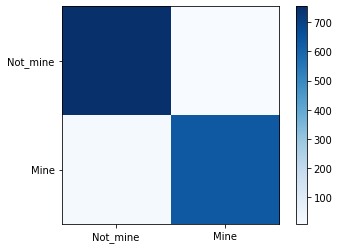

In [15]:
churm = metrics.confusion_matrix(y_test, y_pred)
plt.imshow(churm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not_mine','Mine'])
plt.yticks(tick_marks, ['Not_mine','Mine'])

In [14]:
pd.DataFrame(churm)

,0,1
0,754,9
1,20,637


In [64]:
VP = np.sum(churm[0:1,0:1])
FN = np.sum(churm[0,1:2])
VP, FN

(750, 13)

In [65]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa: ", metrics.cohen_kappa_score(y_test, y_pred))

Exactitud:  0.9873239436619718
Kappa:  0.9745273711170684


In [66]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))


VP = np.sum(churm[1:2,1:2])
FN = np.sum(churm[1,0:1])
specificity = VP/(VP+FN)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))

Precisión     :  0.9804511278195489
Recall        :  0.9923896499238964
Especificidad :  0.9923896499238964
F1-score      :  0.9863842662632376


In [67]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))

VP = np.sum(churm[0:1,0:1])
FN = np.sum(churm[0,1:2])
specificity = VP/(VP+FN)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))

Precisión     :  0.9933774834437086
Recall        :  0.9829619921363041
Especificidad :  0.9829619921363041
F1-score      :  0.9881422924901186


In [68]:
y_pred_proba = model.predict_proba(X_test)

In [69]:
lr_probs = y_pred_proba[:,1]

In [70]:
ns_probs = [0 for _ in range(len(y_test))]

In [71]:
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
ns_auc

0.5

In [72]:
lr_auc = metrics.roc_auc_score(y_test, lr_probs)
lr_auc

0.9945381026190376

In [73]:
#Sumo los scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Bayes: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Bayes: ROC AUC=0.995


In [74]:
ns_fpr, ns_tpr, thresholds  = metrics.roc_curve(y_test,ns_probs)
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, lr_probs)

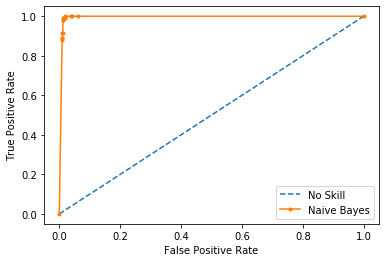

In [76]:
#Plot la roc curva para el modelo
plt.plot(ns_fpr,ns_tpr,linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()